# Additional exploratory analysis for epithileal cellt yping

This notebook performs addtional EDA on the data to refine the analysis.

## 0. Initializations

In [1]:
## 0. Initializations
# -- imports --
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from signals_in_the_noise.preprocessing.gse161529 import GSE161529
from signals_in_the_noise.utilities.storage import get_resources_path
from signals_in_the_noise.utilities.visualization import get_figure_axes

In [2]:
# -- datasets --
gse = GSE161529()

2025-07-27 20:06:13,408 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-07-27 20:06:13,512 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-07-27 20:06:13,664 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-07-27 20:06:13,722 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-07-27 20:06:13,876 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

## 1. Tuning parameters for "Noise" cell clustering

In [3]:
_, all_noise = gse.get_combined_epithilial_dataset(apply_tsne=False)

2025-07-27 20:06:24,915 [INFO] signals_in_the_noise.preprocessing.gse161529: Loading combined datasets...


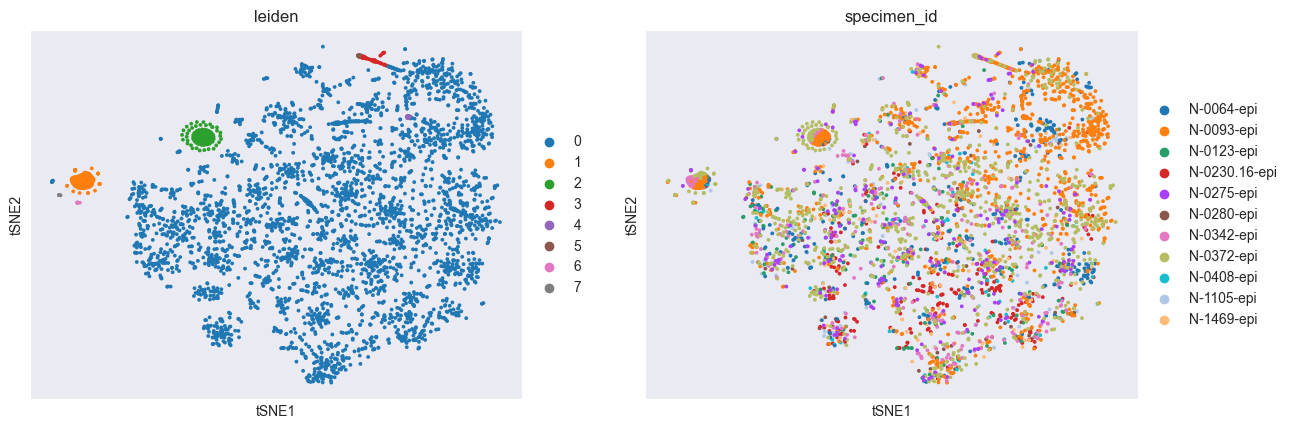

In [5]:
gse.apply_tsne(all_noise, n_neighbors=5)
gse.visualize_tsne(all_noise, color=['leiden', 'specimen_id'])

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-27 20:10:27,377 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-27 20:10:27,378 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
2025-07-27 20:10:45,922 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`


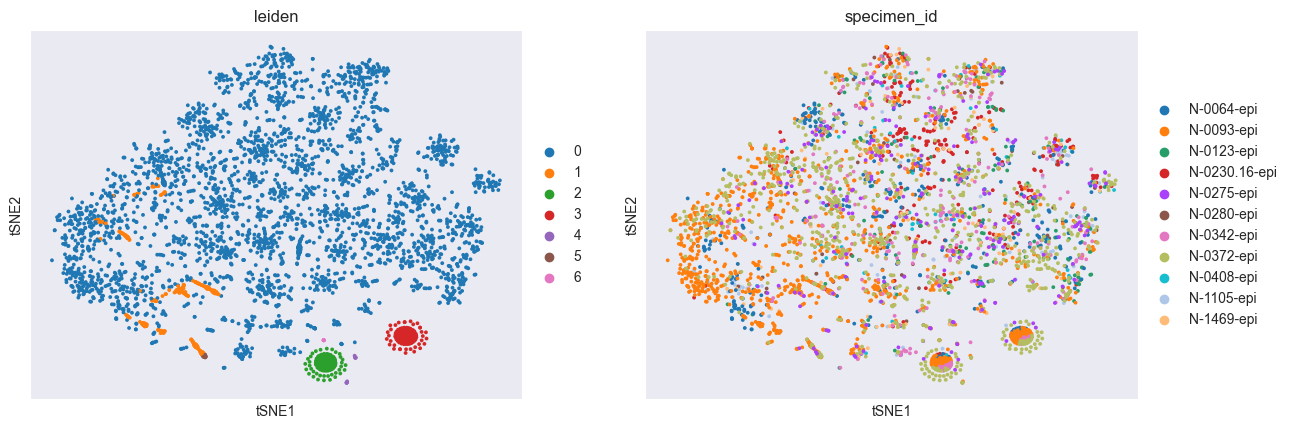

In [6]:
# resolutions = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
# for resolution in resolutions:
#     gse.apply_tsne(all_noise, resolution=resolution)
#     gse.visualize_tsne(all_noise, color=['specimen_id'])
gse.apply_tsne(all_noise, n_neighbors=5, n_pcs=5)
gse.visualize_tsne(all_noise, color=['leiden', 'specimen_id'])

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-27 20:12:40,005 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-27 20:12:40,007 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
2025-07-27 20:12:59,865 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`


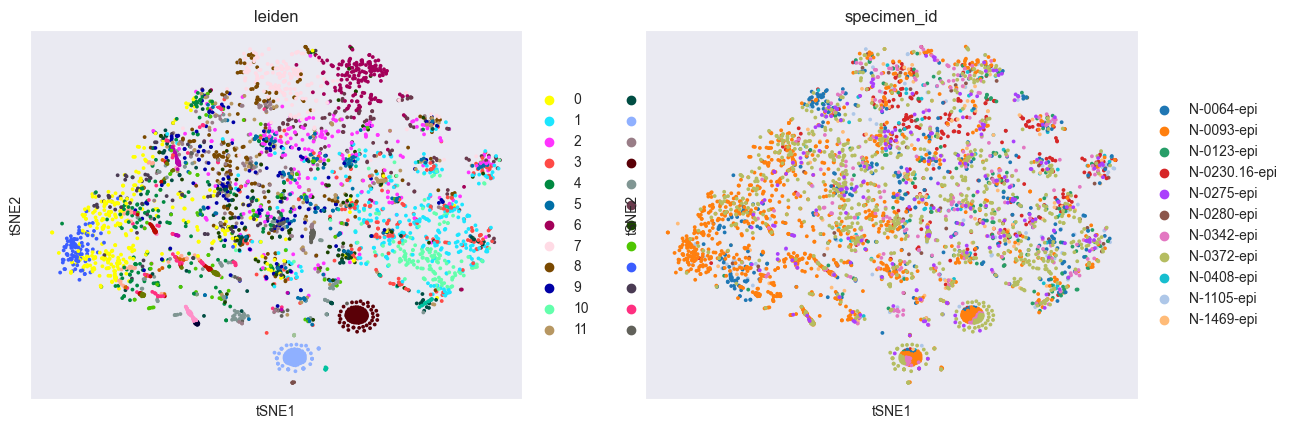

In [7]:
gse.apply_tsne(all_noise, n_neighbors=5, n_pcs=5, resolution=0.8)
gse.visualize_tsne(all_noise, color=['leiden', 'specimen_id'])